# SAMap - comparison of zebrafish with lizard cell types

Using [SAMap](https://elifesciences.org/articles/66747), we were trying to find corresponding cell types between the zebrafish dataset and a published lizard dataset (see [Hain et al., 2022](https://www.science.org/doi/10.1126/science.abp8202) for the article and findings). 

This notebook is simply for visualization purposes.

We start by importing the relevant libraries: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#cvals  = [0., 0.5, 1]
#colors = ['#6E377D',"white",'#EBB400']
cvals  = [0, 1]
#colors = ["white",'#0ea7f1ff']
colors = ["white",'black']

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = LinearSegmentedColormap.from_list("", tuples)

70
233


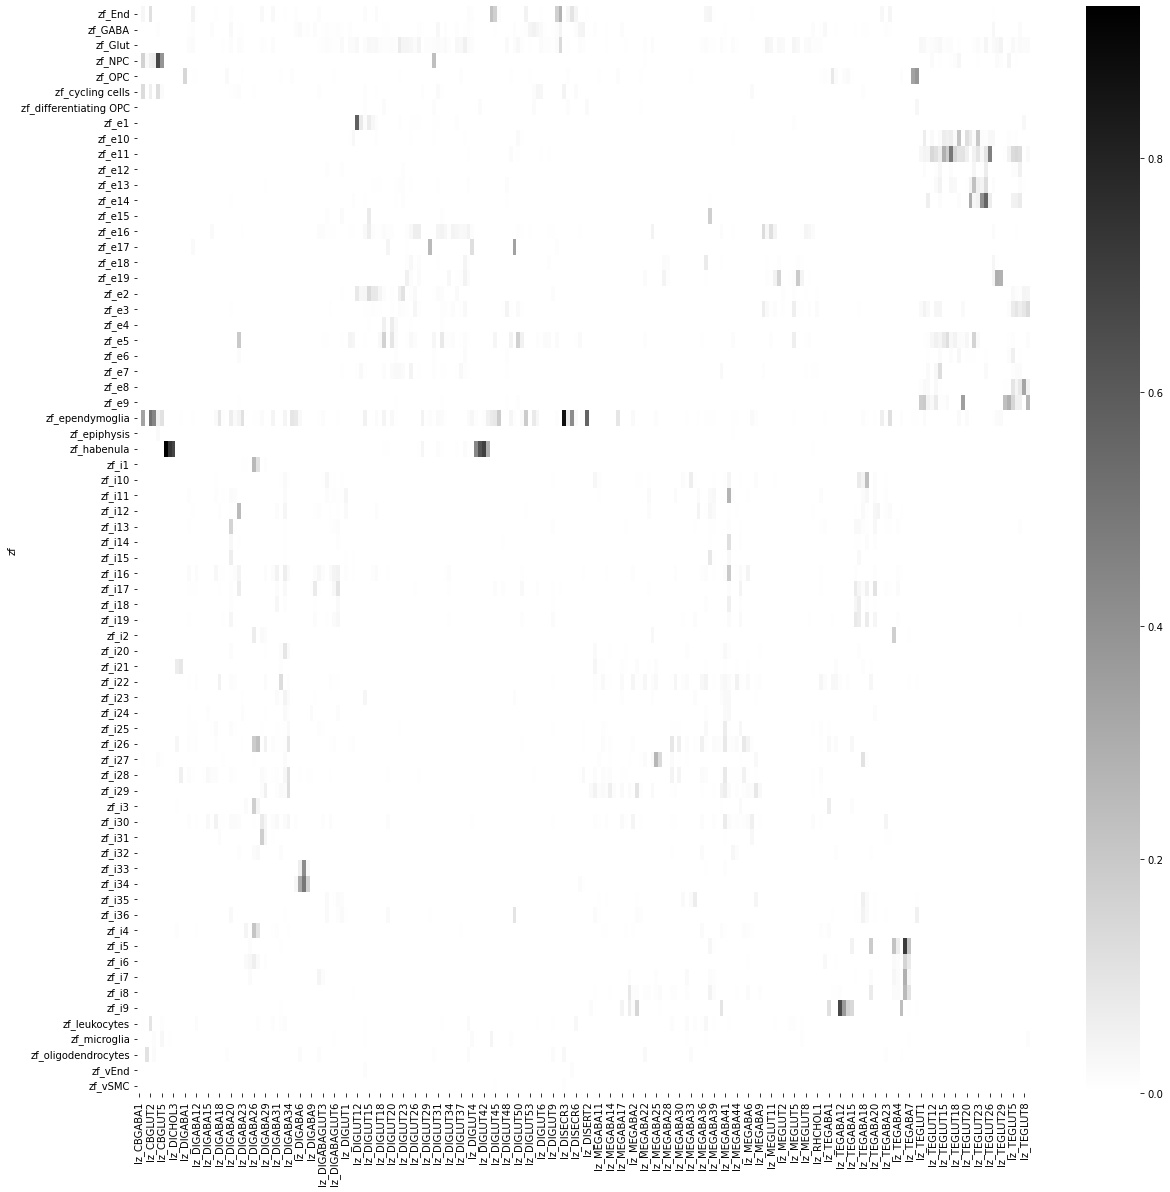

In [2]:
path = "./MappingTable.20230510.OrigCellTypes.tab"
df = pd.read_table(path)
lz_names = []
zf_names = []
for column in df.iloc[:,1:].columns:
    if column.startswith('lz_'):
        lz_names.append(column)
    if column.startswith('zf'):
        zf_names.append(column)
        
print(len(zf_names))
print(len(lz_names))
columns_names = lz_names
columns_names = np.insert(columns_names, 0, "zf")

# prepare dataframe to be filled
df_corr = pd.DataFrame (columns=columns_names, data=np.empty (shape= (len(zf_names), len(columns_names))))

df_corr['zf'] = zf_names
df_corr.index = df_corr["zf"]
df_corr = df_corr.iloc[:,1:]  
df_corr.iloc[:, :] = df.iloc[len(lz_names):,1:len(lz_names)+1]
plt.subplots(figsize =(20,20))
ax = sns.heatmap(df_corr, cmap = cmap)#, annot=True, fmt=".2f", linewidth=.8)
#ax = sns.clustermap(df_corr)

In [3]:
zf_cluster = ["zf_e" + str(i) for i in range(1,20)] + ["zf_i" + str(i) for i in range(1,37)] + ["zf_habenula", "zf_epiphysis"]
df_corr_subset = df_corr.loc[zf_cluster, :]

Now subdivide the lizard cluster along two axes: Neurotransmitter (GABA, glutamate, or other), and brain region

In [4]:
lz_metadata = pd.DataFrame(df_corr_subset.columns)
lz_metadata["area"] = np.repeat(np.nan, 233)
lz_metadata["area"][lz_metadata[0].str.startswith("lz_CB")] = "cerebellum"
lz_metadata["area"][lz_metadata[0].str.startswith("lz_DI")] = "diencephalon"
lz_metadata["area"][lz_metadata[0].str.startswith("lz_ME")] = "mesencephalon"
lz_metadata["area"][lz_metadata[0].str.startswith("lz_TE")] = "telencephalon"
lz_metadata["area"][lz_metadata[0].str.startswith("lz_RH")] = "rhombencephalon"

lz_metadata["neurotransmitter"] = np.repeat(np.nan, 233)
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("GABA")] = "GABA"
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("GLUT")] = "GLUT"
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("GABAGLUT")] = "GABAGLUT"
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("CHOL")] = "CHOL"
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("DOPA")] = "DOPA"
lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("SECR")] = "SECR"

C:\Users\anneluka\AppData\Local\Temp\ipykernel_7332\4141756428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lz_metadata["area"][lz_metadata[0].str.startswith("lz_CB")] = "cerebellum"
C:\Users\anneluka\AppData\Local\Temp\ipykernel_7332\4141756428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lz_metadata["neurotransmitter"][lz_metadata[0].str.contains("GABA")] = "GABA"


Now get the highest SAMap alignment score for each cell type

C:\Users\anneluka\AppData\Local\Temp\ipykernel_7332\1341340607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lz_metadata["samap"][i] = max(df_corr_subset.loc[:,celltype])


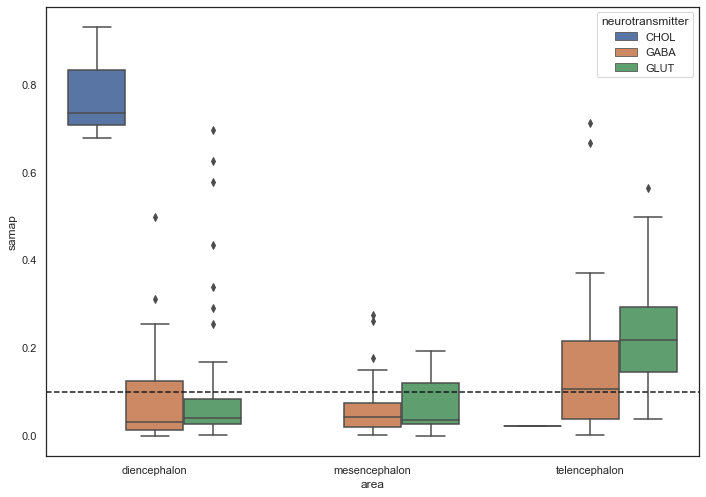

In [5]:
lz_metadata["samap"] = np.repeat(np.nan, 233)
i = 0
for celltype in lz_metadata[0]:
    lz_metadata["samap"][i] = max(df_corr_subset.loc[:,celltype])
    i += 1

area_list = ["diencephalon", "mesencephalon", "telencephalon"]
lz_metadata_subset = lz_metadata[lz_metadata['area'].isin(area_list)]
nt_list = ["GABA", "GLUT", "CHOL"]
lz_metadata_subset = lz_metadata_subset[lz_metadata_subset['neurotransmitter'].isin(nt_list)]

sns.set(rc={'figure.figsize':(11.7,8.27),"axes.spines.right": False, "axes.spines.top": False})
sns.set_style("white")

graph = sns.boxplot(x="area", y="samap", hue="neurotransmitter",           
            data=lz_metadata_subset)
graph.axhline(0.1,color='k', linestyle='--')

#plt.savefig('NeuronalAlignment_output_FullAnnotation_samapScoreBoxplot.svg')

In [6]:
area_list = ["diencephalon", "mesencephalon", "telencephalon"]

 
# check the pandas name column
# contain the given list of strings
print(lz_metadata[lz_metadata['area'].isin(area_list)])
 
# consider a list
#list2 = ['java', 'c']
 
# check the pandas subjects column
# contain the given list of strings
#data[~numpy.isin(data['subjects'], list1)]

              0           area neurotransmitter     samap
7    lz_DICHOL1   diencephalon             CHOL  0.929486
8    lz_DICHOL2   diencephalon             CHOL  0.734500
9    lz_DICHOL3   diencephalon             CHOL  0.678336
10   lz_DIDOPA1   diencephalon             DOPA  0.066717
11   lz_DIDOPA2   diencephalon             DOPA  0.087427
..          ...            ...              ...       ...
228  lz_TEGLUT5  telencephalon             GLUT  0.149077
229  lz_TEGLUT6  telencephalon             GLUT  0.145866
230  lz_TEGLUT7  telencephalon             GLUT  0.129302
231  lz_TEGLUT8  telencephalon             GLUT  0.325747
232  lz_TEGLUT9  telencephalon             GLUT  0.261488

[224 rows x 4 columns]


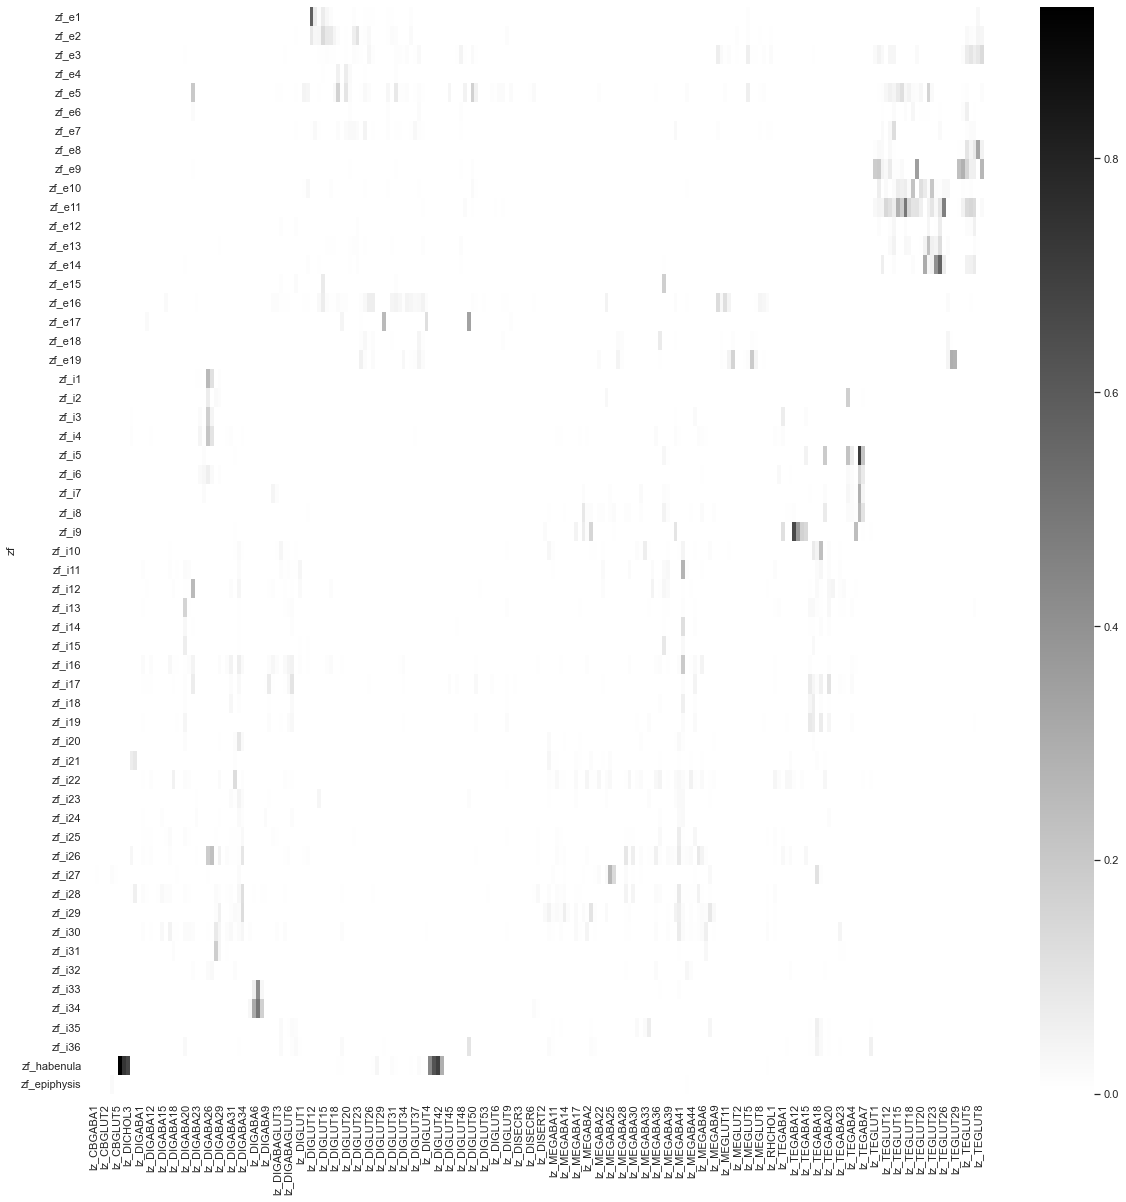

In [7]:
plt.subplots(figsize =(20,20))
ax = sns.heatmap(df_corr_subset, cmap = cmap)

Only look at cell type alignments with a score above 0.1

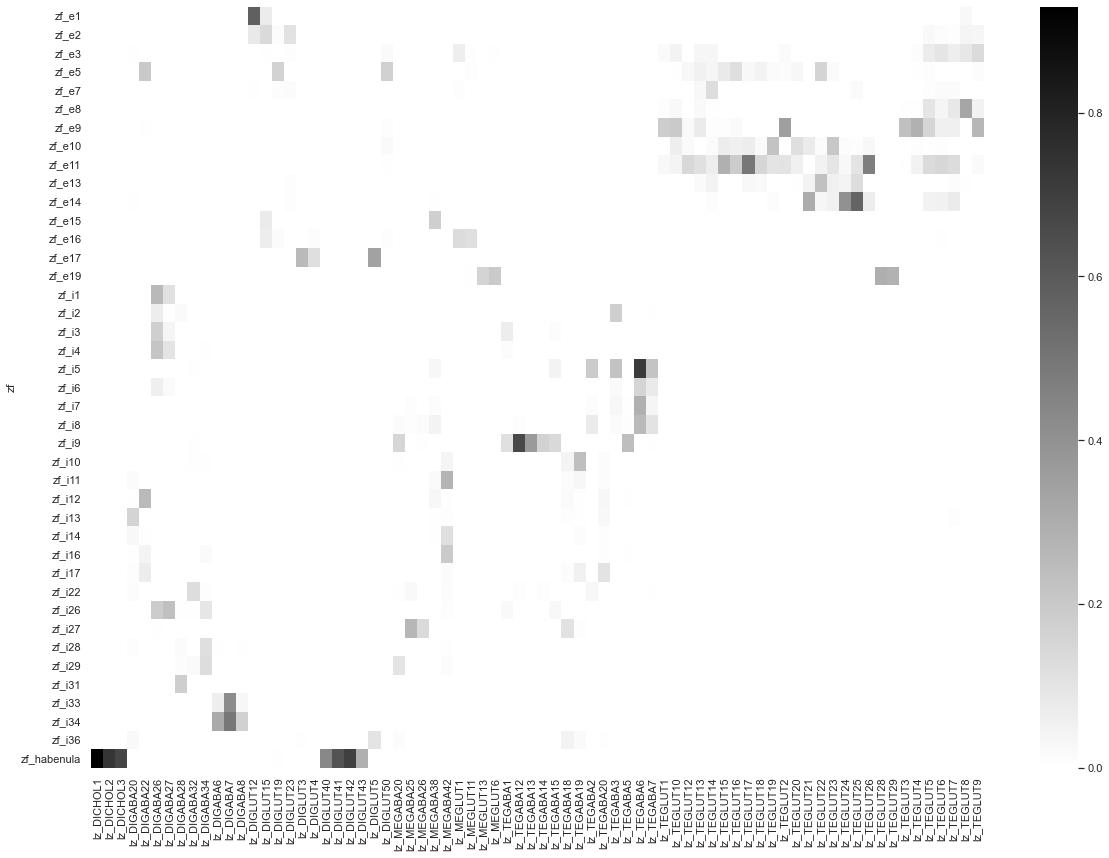

In [8]:
idx = np.where(df_corr_subset.max(axis = 0)>0.1)[0]
idx_row = np.where(df_corr_subset.max(axis = 1)>0.1)[0]

df_corr_relevant = df_corr_subset.iloc[idx_row,idx]

plt.subplots(figsize =(20,14))
ax = sns.heatmap(df_corr_relevant, cmap = cmap)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.savefig('NeuronalAlignment_output_FullAnnotation.svg')

15
16


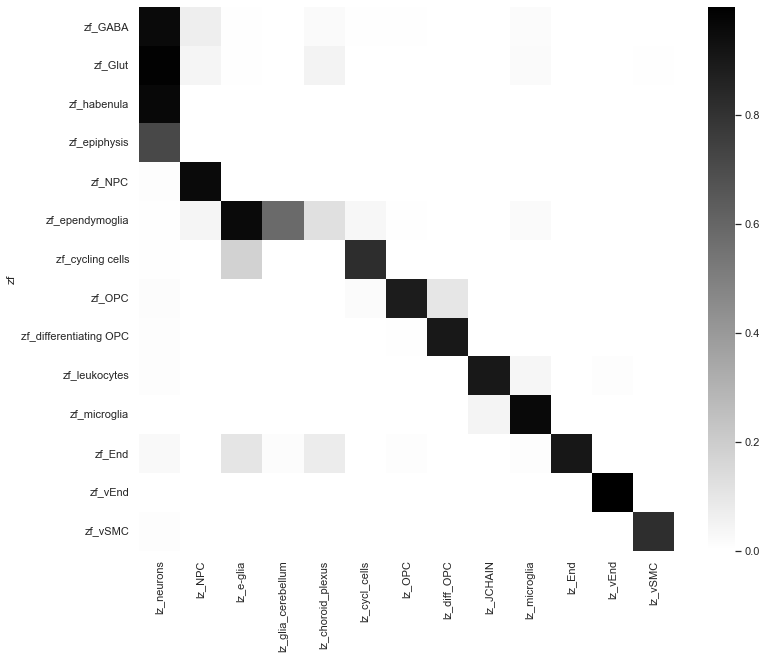

In [9]:
path = "./M.all_provided_data__using_scdr_v2.20230524.tab"

df = pd.read_table(path)
lz_names = []
zf_names = []
for column in df.iloc[:,1:].columns:
    if column.startswith('lz_'):
        lz_names.append(column)
    if column.startswith('zf'):
        zf_names.append(column)
        
print(len(zf_names))
print(len(lz_names))
columns_names = lz_names
columns_names = np.insert(columns_names, 0, "zf")

# prepare dataframe to be filled
df_corr = pd.DataFrame (columns=columns_names, data=np.empty (shape= (len(zf_names), len(columns_names))))

df_corr['zf'] = zf_names
df_corr.index = df_corr["zf"]
df_corr = df_corr.iloc[:,1:]  
df_corr.iloc[:, :] = df.iloc[len(lz_names):,1:len(lz_names)+1]

plt.subplots(figsize =(12,10))
ax = sns.heatmap(df_corr.loc[["zf_GABA", "zf_Glut", "zf_habenula", "zf_epiphysis", "zf_NPC", "zf_ependymoglia","zf_cycling cells", "zf_OPC", "zf_differentiating OPC", "zf_leukocytes", "zf_microglia", "zf_End", "zf_vEnd", "zf_vSMC"],
                             ["lz_neurons", "lz_NPC", "lz_e-glia", "lz_glia_cerebellum","lz_choroid_plexus", "lz_cycl_cells", "lz_OPC", "lz_diff_OPC", "lz_JCHAIN", "lz_microglia", "lz_End", "lz_vEnd", "lz_vSMC"]], cmap = cmap)

#plt.savefig('NeuronalAlignment_output_FullAnnotation_MajorCellTypes.svg')

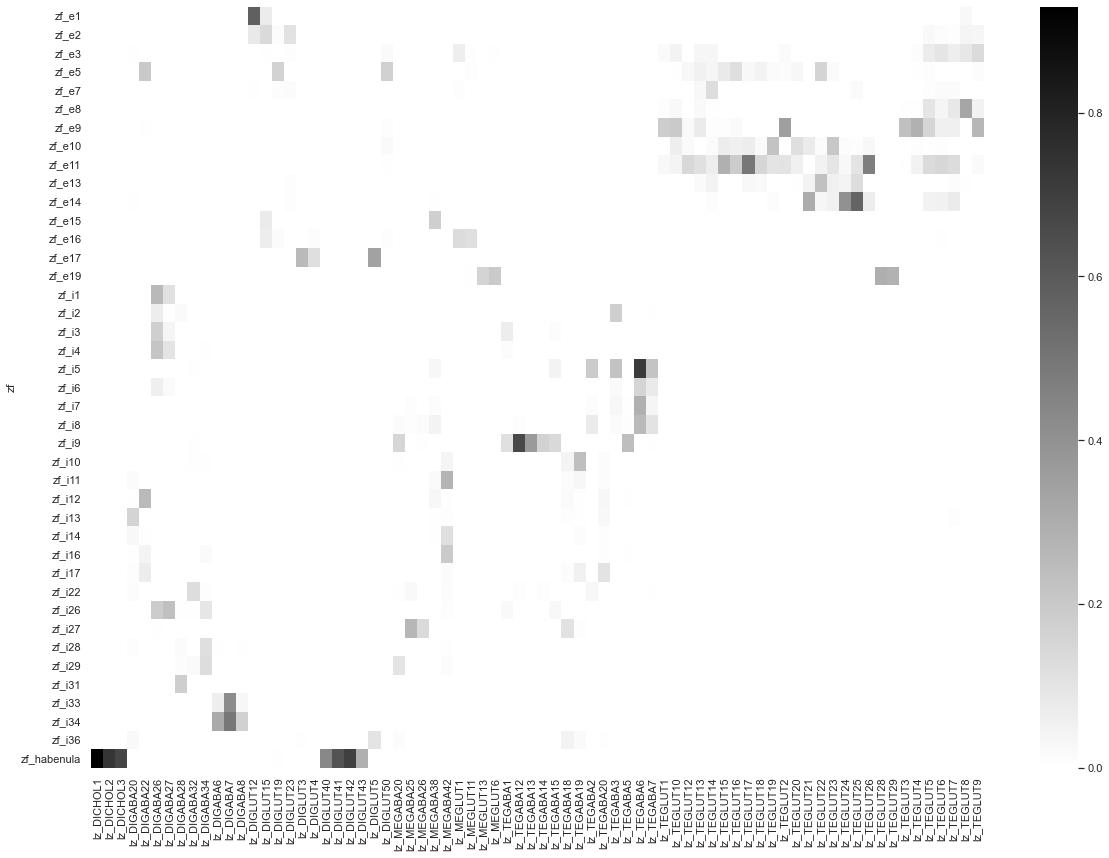

In [10]:
df_corr_subset = df_corr_subset.loc[:, df_corr_subset.columns != "lz_nan"]

idx = np.where(df_corr_subset.max(axis = 0)>0.1)[0]
idx_row = np.where(df_corr_subset.max(axis = 1)>0.1)[0]

df_corr_relevant = df_corr_subset.iloc[idx_row,idx]

plt.subplots(figsize =(20,14))
ax = sns.heatmap(df_corr_relevant, cmap = cmap)

